In [1]:
%load_ext autoreload
%autoreload 2

from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean

import sys

# path to own functions
sys.path.append('../../')

import data_OSISAF.icedrift_lr as OSIdrift

import data_NSIDC.icedrift as PPdrift

import data_UniBremen.SIC as UNISIC
import data_UniBremen.MultiYearIce as MYI

In [2]:



date = datetime(2020,3,20)

data = {}
# SIC
data['sic'] = UNISIC.open_local_file(date, res = '6250', hem = 'n',
                              area = False, include_units=False)

ds = xr.open_dataset('/Volumes/Seagate_Jewell/KenzieStuff/GEBCO/re-gridded/master_625kmASI_V1.nc')
ds.close()

ai,aj = 720,1500
bi,bj = 190,600
XX = data['sic']['xx'][ai:aj, bi:bj]
YY = data['sic']['yy'][ai:aj, bi:bj]




# Later try to follow this tutorial?
### https://fire.trainhub.eumetsat.int/docs/figure1_MODIS_L1B.html


In [3]:
sys.path.append('../src/')
import L1BMODIS

def normalize(band):
    band_min, band_max = np.nanmin(band), np.nanmax(band)
    return ((band-band_min)/((band_max - band_min)))

def normalize_v2(band, vmin = 0.01, vmax = 0.35):
    return ((band-vmin)/((vmax - vmin)))

def gammacorr(band, gamma):
    return np.power(band, 1/gamma)

def brighten(band, beta, alpha):
    return np.clip( alpha*band + beta, 0, 1)
    

In [4]:
# file = '/Users/mackenziejewell/Desktop/MODISfiles/MOD021KM.A2012105.2340.061.2017332132437.hdf'
# geofile = '/Users/mackenziejewell/Desktop/MODISfiles/MOD03.A2012105.2340.061.2017332081925.hdf'


# 2007
#-------------------------------------------------------------------------------------------------
# file = '/Users/mackenziejewell/Desktop/MODISfiles/MOD021KM.A2007087.2225.061.2017246031155.hdf'
# geofile = '/Users/mackenziejewell/Desktop/MODISfiles/MOD03.A2007087.2225.061.2017245141351.hdf'

# file = '/Users/mackenziejewell/Desktop/MODISfiles/MOD021KM.A2007087.2230.061.2017246031203.hdf'
# geofile = '/Users/mackenziejewell/Desktop/MODISfiles/MOD03.A2007087.2230.061.2017245141112.hdf'
#-------------------------------------------------------------------------------------------------

# 2009 LFBO
file = '/Users/mackenziejewell/Desktop/MODISfiles/MOD021KM.A2009059.2145.061.2017296145751.hdf'
geofile = '/Users/mackenziejewell/Desktop/MODISfiles/MOD03.A2009059.2145.061.2017294161458.hdf'

file = '/Users/mackenziejewell/Desktop/MODISfiles/MOD021KM.A2009061.2135.061.2017296163131.hdf'
geofile = '/Users/mackenziejewell/Desktop/MODISfiles/MOD03.A2009061.2135.061.2017294174334.hdf'

# # 2021 FLAW
# file = '/Users/mackenziejewell/Desktop/MODISfiles/MOD021KM.A2021072.2030.061.2021073071940.hdf'
# geofile = '/Users/mackenziejewell/Desktop/MODISfiles/MOD03.A2021072.2030.061.2021073042257.hdf'

# 2004 FLAW
file = '/Users/mackenziejewell/Desktop/MODISfiles/MOD021KM.A2004059.2115.061.2017198133429.hdf'
geofile = '/Users/mackenziejewell/Desktop/MODISfiles/MOD03.A2004059.2115.061.2017197061643.hdf'



# 2021 FLAW
#-------------------------------------------------------------------------------------------------
# file = '/Users/mackenziejewell/Desktop/MODISfiles/MOD021KM.A2021073.2115.061.2021074072032.hdf'
# geofile = '/Users/mackenziejewell/Desktop/MODISfiles/MOD03.A2021073.2115.061.2021074040507.hdf'

# file = '/Users/mackenziejewell/Desktop/MODISfiles/MOD021KM.A2021073.2110.061.2021074072044.hdf'
# geofile = '/Users/mackenziejewell/Desktop/MODISfiles/MOD03.A2021073.2110.061.2021074040843.hdf'

#-------------------------------------------------------------------------------------------------

# 2004
file = '/Users/mackenziejewell/Desktop/MODISfiles/MOD021KM.A2004059.2115.061.2017198133429.hdf'
geofile = '/Users/mackenziejewell/Desktop/MODISfiles/MOD03.A2004059.2115.061.2017197061643.hdf'

#2020
file = '/Users/mackenziejewell/Desktop/MODISfiles/MOD021KM.A2020082.2235.061.2020083072820.hdf'
geofile = '/Users/mackenziejewell/Desktop/MODISfiles/MOD03.A2020082.2235.061.2020083050400.hdf'



# file = '/Users/mackenziejewell/Desktop/MODISfiles/MOD021KM.A2012105.0525.061.2017332131526.hdf'
# geofile = '/Users/mackenziejewell/Desktop/MODISfiles/MOD03.A2012105.0525.061.2017332080940.hdf'

# file = '/Users/mackenziejewell/Desktop/MODISfiles/MOD021KM.A2012101.2225.061.2017332140417.hdf'
# geofile = '/Users/mackenziejewell/Desktop/MODISfiles/MOD03.A2012101.2230.061.2017332101152.hdf'

# file = '/Users/mackenziejewell/Desktop/MODISfiles/MOD021KM.A2012101.2230.061.2017332140235.hdf'
# geofile = '/Users/mackenziejewell/Desktop/MODISfiles/MOD03.A2012101.2230.061.2017332101152.hdf'

lon, lat = L1BMODIS.get_MODISgeo(geofile)

# L1BMODIS.get_hdf_data(file,'Geolocation_Fields',None)

In [5]:
np.nanmin(dataB)

NameError: name 'dataB' is not defined

In [7]:
lat2 = lat
lon2 = lon
RGB2 = RGB

NameError: name 'RGB' is not defined

In [12]:
# dataR = L1BMODIS.load_MODIS1KMband(file, band = 14)
# dataG = L1BMODIS.load_MODIS1KMband(file, band = 12)
# dataB = L1BMODIS.load_MODIS1KMband(file, band = 10)

dataR = L1BMODIS.load_MODIS1KMband(file, band = 1)
dataG = L1BMODIS.load_MODIS1KMband(file, band = 4)
dataB = L1BMODIS.load_MODIS1KMband(file, band = 3)

# scale_R = brighten(normalize_v2(gammacorr(dataR, 1.5), vmin = 0.05, vmax = 0.55), 0., 1.25)
# scale_G = brighten(normalize_v2(gammacorr(dataG, 1.5), vmin = 0.05, vmax = 0.55), 0., 1.25)
# scale_B = brighten(normalize_v2(gammacorr(dataB, 1.5), vmin = 0.05, vmax = 0.55), 0., 1.25)



# scale_R = brighten(normalize_v2(gammacorr(dataR, 1.5), vmin = -0.05, vmax = 0.365), 0., 1.35)
# scale_G = brighten(normalize_v2(gammacorr(dataG, 1.5), vmin = -0.05, vmax = 0.365), 0., 1.35)
# scale_B = brighten(normalize_v2(gammacorr(dataB, 1.5), vmin = -0.05, vmax = 0.365), 0., 1.35)


# # 2009 3-02
# scale_R = brighten(normalize_v2(gammacorr(dataR, 1.5), vmin = 0.0, vmax = 0.4), 0., 1.35)
# scale_G = brighten(normalize_v2(gammacorr(dataG, 1.5), vmin = 0.0, vmax = 0.4), 0., 1.35)
# scale_B = brighten(normalize_v2(gammacorr(dataB, 1.5), vmin = 0.0, vmax = 0.4), 0., 1.35)


# # 2021 3-13
# scale_R = brighten(normalize_v2(gammacorr(dataR, 1.5), vmin = 0.05, vmax = 0.45), 0., 1.25)
# scale_G = brighten(normalize_v2(gammacorr(dataG, 1.5), vmin = 0.05, vmax = 0.45), 0., 1.25)
# scale_B = brighten(normalize_v2(gammacorr(dataB, 1.5), vmin = 0.05, vmax = 0.45), 0., 1.25)

# 2004 
# scale_R = brighten(normalize_v2(gammacorr(dataR, 1.5), vmin = -0.05, vmax = 0.375), 0., 1.35)
# scale_G = brighten(normalize_v2(gammacorr(dataG, 1.5), vmin = -0.05, vmax = 0.375), 0., 1.35)
# scale_B = brighten(normalize_v2(gammacorr(dataB, 1.5), vmin = -0.05, vmax = 0.375), 0., 1.35)

#2020
scale_R = brighten(normalize_v2(gammacorr(dataR, 1.5), vmin = 0.05, vmax = 0.5), 0., 1.25)
scale_G = brighten(normalize_v2(gammacorr(dataG, 1.5), vmin = 0.05, vmax = 0.5), 0., 1.25)
scale_B = brighten(normalize_v2(gammacorr(dataB, 1.5), vmin = 0.05, vmax = 0.5), 0., 1.25)

# scale_R = brighten(gammacorr(dataR, 1.5), 0., 1.25)
# scale_G = brighten(gammacorr(dataG, 1.5), 0., 1.25)
# scale_B = brighten(gammacorr(dataB, 2), 0., 1.25)

RGB = np.stack([scale_R, scale_G, scale_B], axis=-1)

/var/folders/p8/hz449fpx6nscv0jb1klyfqb40000gp/T/ipykernel_48449/2348126445.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lon[::sp,::sp], lat[::sp,::sp], RGB[::sp,::sp], zorder=0)


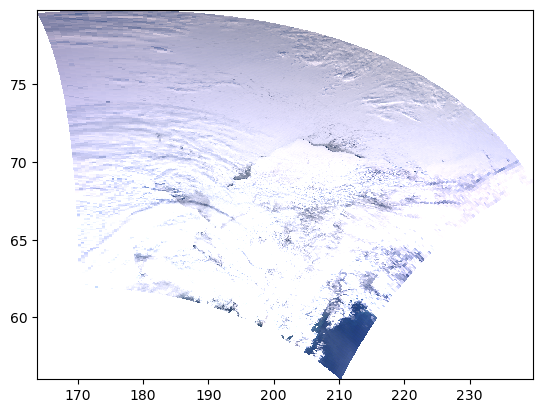

In [13]:
sp = 5
plt.pcolormesh(lon[::sp,::sp], lat[::sp,::sp], RGB[::sp,::sp], zorder=0)

In [14]:
fig, ax = create_wide_map(scalebar = False, depth_shade = False, depth_contours = True,
                    contour_labels=True, place_labels=False)

sp = 1


ax.pcolormesh(lon[::sp,::sp], lat[::sp,::sp], RGB[::sp,::sp], transform=ccrs.PlateCarree(), zorder=0)
# ax.pcolormesh(lon2[::sp,::sp], lat2[::sp,::sp], RGB2[::sp,::sp], transform=ccrs.PlateCarree(), zorder=0)


# ax.contour(XX, YY, ds.avg.values[ai:aj, bi:bj], 
#            levels=[-100,-20,-5], colors=['k'], linestyles='dashed', linewidths=[0.5,0.5], 
#            transform=data['sic']['proj'], zorder=1)

# fig.savefig(f'/Users/mackenziejewell/Desktop/MODISfiles/figures/img_{file[-34:-22]}.png',
#            dpi = 500, bbox_inches='tight',  pad_inches=0)


NameError: name 'create_wide_map' is not defined

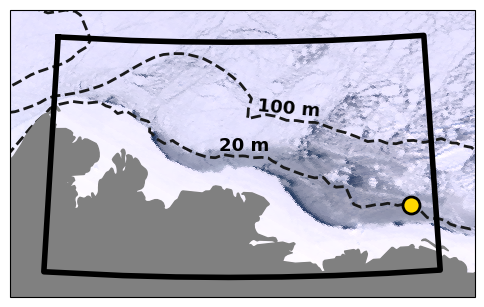

In [112]:
fig, ax = create_zoom_map(scalebar = False, depth_shade = False, depth_contours = True)

size = 150
ax.scatter(-149.47707, 70.77422, s=size, lw=2, facecolor='gold', edgecolor='k', transform=ccrs.PlateCarree())
# ax.scatter( -149.575383, 70.61965,  s=size, lw=2, facecolor='gold', edgecolor='k', transform=ccrs.PlateCarree())

poly_lons = np.array([-156.5, -155, -154, -153, -152, -151, -150, -149,
                      -149, -150,-151,-152,-153,-154,-155, -156.5, 
                      -156.5])
poly_lats = np.array([71.85, 71.85, 71.85, 71.85, 71.85, 71.85, 71.85, 71.85, 
                      70.35, 70.35, 70.35, 70.35, 70.35, 70.35, 70.35, 70.35,
                      71.85])

ax.plot(poly_lons, poly_lats, c='k', lw=4, transform=ccrs.Geodetic(), zorder=101)


sp = 1


ax.pcolormesh(lon[::sp,::sp], lat[::sp,::sp], RGB[::sp,::sp], transform=ccrs.PlateCarree(), zorder=0)


color = 'k'

# ax.text(0.4,0.76,'100 m',rotation=-32, size=13, c=color, weight='bold', transform=ax.transAxes, zorder=11)
# ax.text(0.325,0.51,'20 m',rotation=-28,size=13,  c=color, weight='bold', transform=ax.transAxes, zorder=11)
    
ax.text(0.53,0.63,'100 m',rotation=-5, size=13, c=color, weight='bold', transform=ax.transAxes, zorder=11)
ax.text(0.45,0.51,'20 m',rotation=-0,size=13,  c=color, weight='bold', transform=ax.transAxes, zorder=11)
    
    
fig.savefig(f'/Users/mackenziejewell/Desktop/MODISfiles/figures/img_{file[-34:-22]}_v2.png',
           dpi = 500, bbox_inches='tight',  pad_inches=0)

In [71]:
def create_zoom_map(scalebar = True, depth_shade = True, depth_contours = True):
    
    fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=-153)), 
                           figsize=(6,6))
    ax.set_facecolor('lightgray')
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                                edgecolor='face', facecolor='gray'), zorder=2)
        

    expand = -40000
    ax.set_xlim(-200000-expand,220000+expand)
    ax.set_ylim(-2270000-expand,-1980000+expand)


    if scalebar:
        add_scalebar(ax, 110000, -2245000, step = 25*1000, num = 4, colors=['k','w'], size=9, lw=4)
        ax.text(np.array([-151.5]), np.array([70]), 'N', weight='bold', va = 'center', ha='center', transform=ccrs.PlateCarree())
        ax.quiver(np.array([-151.5]), np.array([70.05]), 
                  np.array([0]), np.array([1]), scale=28,
                  width = 0.0005, 
                  headaxislength = 650, headlength = 1000, headwidth=1000,
                  transform=ccrs.PlateCarree(), zorder=300)

        
    if depth_shade:
        

        norm = matplotlib.colors.TwoSlopeNorm(-200, vmin=-3500, vmax=0)
        cmap = cmocean.tools.crop_by_percent(cmocean.cm.deep_r, 20, which='min', N=None)
        cmap = cmocean.tools.crop_by_percent(cmap, 3, which='max', N=None)

        # cmap = cmocean.tools.crop_by_percent(cmocean.cm.gray, 20, which='min', N=None)
        # cmap = cmocean.tools.crop_by_percent(cmap, 3, which='max', N=None)
        ax.pcolormesh(elongrid, elatgrid, elevations,
                      cmap=cmap, norm=norm,
                      zorder=0, transform=ccrs.PlateCarree())



        
    if depth_contours:
        
        color=[0.1,0.1,0.1]
        LW=2
        
        sp = 2
#         ax.contour(elongrid[::sp,::sp], elatgrid[::sp,::sp], elevations[::sp,::sp],
#            levels=[-100], colors=[color], linewidths=LW, 
#            linestyles='dashed', zorder=2, transform=ccrs.PlateCarree())

        ax.contour(XX, YY, ds.avg.values[ai:aj, bi:bj],
           levels=[-100,-20], colors=[color], linewidths=LW, 
           linestyles='dashed', zorder=1, transform=data['sic']['proj'])

#         ax.text(0.445,0.7,'100 m',rotation=-43, size=13, c=color, weight='bold', transform=ax.transAxes, zorder=11)
#         ax.text(0.22,0.63,'20 m',rotation=-20,size=13,  c=color, weight='bold', transform=ax.transAxes, zorder=11)
    
#         ax.text(0.85,0.5,'100 m',rotation=-20, c=color, weight='bold', transform=ax.transAxes, zorder=11)
#         ax.text(0.865,0.335,'20 m',rotation=-0, c=color, weight='bold', transform=ax.transAxes, zorder=11)
#         ax.text(0.85,0.275,'5 m',rotation=-5, c=color, weight='normal', transform=ax.transAxes, zorder=11)


#     ax.text(0.64,0.57,'PACK',rotation=-10, c='k', size=15, weight='bold', transform=ax.transAxes, zorder=11)
#     ax.text(0.62,0.435,'FLAW',rotation=-10, c='k', size=15, weight='bold', transform=ax.transAxes, zorder=11)
#     ax.text(0.6,0.3,'FAST',rotation=-10, c='k', size=15, weight='bold', transform=ax.transAxes, zorder=11)



    
    return fig, ax

In [17]:
ds2 = xr.open_dataset('/Volumes/Seagate_Jewell/KenzieStuff/GEBCO/GEBCO_2024/gebco_2024_n90.0_s55.0_w-180.0_e180.0.nc')
ds2.close()
sp = 50
elongrid, elatgrid = np.meshgrid(ds2.lon[::sp], ds2.lat[::sp])
elevations = ds2.elevation.values[::sp, ::sp]

In [264]:
def create_wide_map(scalebar = True, depth_shade = True, depth_contours = True,
                    contour_labels=True, place_labels=True):
    
    fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=-153)), 
                           figsize=(8,4))
    ax.set_facecolor('lightgray')
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                                edgecolor='face', facecolor='gray'), zorder=2)
    ax.set_xlim(-310000,220000+400000)
    ax.set_ylim(-2310000,-1980000+8000)
    
    
    
    if depth_shade:
        

        norm = matplotlib.colors.TwoSlopeNorm(-300, vmin=-3500, vmax=-5)
        cmap = cmocean.tools.crop_by_percent(cmocean.cm.deep_r, 20, which='min', N=None)
        cmap = cmocean.tools.crop_by_percent(cmap, 3, which='max', N=None)
#         cmap = matplotlib.cm.Blues_r

#         cmap = cmocean.tools.crop_by_percent(cmocean.cm.gray, 20, which='min', N=None)
#         cmap = cmocean.tools.crop_by_percent(cmap, 3, which='max', N=None)
        ax.pcolormesh(elongrid, elatgrid, elevations,
                      cmap=cmap, norm=norm,
                      zorder=0, transform=ccrs.PlateCarree())

    if depth_contours:
        
        color=[0.3,0.3,0.3]
        LW=0.75
        
        sp = 2
#         ax.contour(elongrid[::sp,::sp], elatgrid[::sp,::sp], elevations[::sp,::sp],
#            levels=[-100], colors=[color], linewidths=LW, 
#            linestyles='dotted', zorder=2, transform=ccrs.PlateCarree())

        ax.contour(XX, YY, ds.avg.values[ai:aj, bi:bj],
           levels=[-100,-20], colors=[color], linewidths=LW, 
           linestyles='dashed', zorder=1, transform=data['sic']['proj'])
        
    if contour_labels:
        ax.text(-146, 70.775,'100 m',rotation=-12, size = 10, c=color, weight='normal', transform=ccrs.PlateCarree(), zorder=11)
        ax.text(-146.5, 70.25,'20 m',rotation=-15, size = 10, c=color, weight='normal', transform=ccrs.PlateCarree(), zorder=11)
        
        
#         ax.text(-152.5, 71.35,'100 m',rotation=-12, size = 9, c=color, weight='normal', transform=ccrs.PlateCarree(), zorder=11)
#         ax.text(-152.8, 71.075,'20 m',rotation=-15, size = 9, c=color, weight='normal', transform=ccrs.PlateCarree(), zorder=11)

        
#         ax.text(-153, 70.9,'5 m',rotation=-10, c=color, weight='normal', transform=ccrs.PlateCarree(), zorder=11)
        
    
        
        
#         ax.contour(XX, YY, ds.avg.values[ai:aj, bi:bj],
#            levels=[-4000,-3000, -2000, -1000,-500], colors=[[0.3,0.3,0.3]], linewidths=0.5, 
#            linestyles='solid', zorder=1, transform=data['sic']['proj'])

#         ax.text(0.85,0.5,'100 m',rotation=-20, c=color, weight='normal', transform=ax.transAxes, zorder=11)
#         ax.text(0.865,0.335,'20 m',rotation=-0, c=color, weight='normal', transform=ax.transAxes, zorder=11)
#         ax.text(0.85,0.275,'5 m',rotation=-5, c=color, weight='normal', transform=ax.transAxes, zorder=11)
    
    

    
    
    if scalebar:
        add_scalebar(ax, -220000, -2270000, step = 50*1000, num = 4, colors=['k','w'],
                     size=9, lw=4, text_offset_top = 5000)
        
        arrow_lon = -153.5
        arrow_lat = 69.75
        
        ax.text(np.array([arrow_lon]), np.array([arrow_lat]), 'N', weight='bold', va = 'center', ha='center', transform=ccrs.PlateCarree())
        ax.quiver(np.array([arrow_lon]), np.array([arrow_lat+0.05]), 
                  np.array([0]), np.array([1]), scale=28,
                  width = 0.0005, 
                  headaxislength = 650, headlength = 1000, headwidth=1000,
                  transform=ccrs.PlateCarree(), zorder=300)
        
        
    if place_labels:
        text_kwargs = {'color' : [0.3,0.3,0.3], 'alpha':1, 'size':13, 'weight':'bold',
               'ha' : 'center', 'va':'center', 'zorder':11}
        ax.text(0.465,0.51,'Beaufort Shelf', rotation=-13, transform=ax.transAxes, **text_kwargs)
#         ax.text(0.5,0.485,'Alaskan Beaufort Shelf', rotation=-13, transform=ax.transAxes, **text_kwargs)
        text_kwargs = {'color' : 'gray', 'alpha':1,  'weight':'normal',
                       'ha' : 'center', 'va':'center', 'zorder':11}
        ax.text(0.6,0.8,'Beaufort\nSea', rotation=0, size=12, transform=ax.transAxes, **text_kwargs)
        ax.text(0.075,0.775,'Chukchi\nSea', rotation=0, size=10.5, transform=ax.transAxes, **text_kwargs)

        color = [0.3,0.3,0.3]
        text_kwargs = {'color' : color, 'alpha':1,  'weight':'normal',
                       'ha' : 'center', 'va':'center', 'zorder':11}
        ax.scatter(-156.7886, 71.2906, marker='*', c=color, s=100, lw=0, zorder=100, transform=ccrs.PlateCarree())
        # ax.text(0.145,0.55,'Point\nBarrow', rotation=0, size=9, transform=ax.transAxes, **text_kwargs)
        ax.text(0.137,0.55,'Utqiagvik', rotation=0, size=9, transform=ax.transAxes, **text_kwargs)

        ax.scatter(-148.4, 70.29, marker='*', c=color, s=100, lw=0, zorder=100, transform=ccrs.PlateCarree())
        ax.text(0.55,0.2,'Prudhoe Bay', rotation=0, size=9, transform=ax.transAxes, **text_kwargs)

        

    return fig, ax